# Homework *week2*

Դիցուք ունենք supervised learning-ի հետևյալ խնդիրը:

Մեզ տրված են երկու տեսակ ծաղիկների (A և B) վերաբերյալ տվյալներ (ցողունի բարձրություն ($x_1$) և պսակի տրամագիծ($x_2$)): Քանի որ խնդիրը supervised learning-ի է, հետևաբար նաև ունենք ծաղիկների label-ները՝ Y:
<br>Մեր խնդիրն է ունենալ այնպիսի մոդել, որին ինչ-որ ծաղիկի X-երը տանք, այն մեզ ասի, թե ծաղիկը A տեսակի է, թե B (կամ, որ նույնն է, մեզ ասի ծաղիկը A տեսակի է, թե ոչ):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# մեր տվյալներն են, ունենք 7 ծաղիկ` 4-ը A, 3-ը B

X = np.array([[26.86,  6.86],
               [29.48,  8.57],
               [29.63,  8.01],
               [33.74,  7.  ],
               [18.54,  6.97],
               [15.98,  5.69],
               [19.01,  4.5 ]])


Y = np.array([["A"],
              ["A"],
              ["A"],
              ["A"],
              ["B"],
              ["B"],
              ["B"],])

In [3]:
#Նորմավորենք X-երը
X[:,0] -= np.mean(X[:,0])
X[:,1] -= np.mean(X[:,1])

X[:,0] /= np.var(X[:,0])
X[:,1] /= np.var(X[:,1])

Y-ները կարող ենք կոդավորել 1-երով ու 0-ներով (one-hot encoding), այսինքն՝ դարձնենք 7x2-չափանի մատրից: Յուրաքանչյուր տողում մեկ հատ 1, մեկ հատ 0: Եթե առաջին սյունում 1 է, ապա ծաղիկը A է և ընդհակառակը: 

In [4]:
Y = np.array ([[1,0] if i[0]=="A" else [0,1] for i in Y])

In [5]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

Պատկերենք ծաղիկները ըստ $x_1$ և $x_2$-ի:

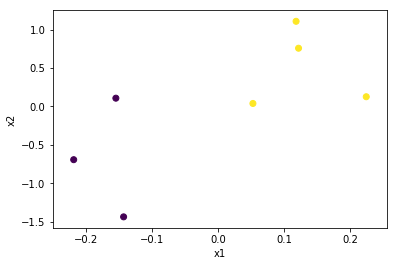

In [6]:
plt.scatter(X[:,0],X[:,1], c = Y[:,0])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Առաջադրանք N1

__Կառուցել մեր խնդրին համապատասխան նեյրոնային ցանցը:__

-  Ակնհայտ է, որ այն պետք է ունենա 2 հատ input ($x_1$ և $x_2$-ին համապատասխան) և երկու հատ output ($y_1$ և $y_2$), որոնցից առաջինը ցույց է տալու տվյալ ծաղիկի՝ A լինելու հավանականությունը, երկրորդը՝ B լինելու հավանականությունը: Output-ները գտնվելու են (0,1) միջակայքում և երկուսի գումարը պարտադիր չէ, որ լինի 1: 
-  Ցանցը պետք է ունենա 1 հատ hidden layer 4 նեյրոնով, այսինքն՝ ցանցի կառուցվածքը լինում է 2-4-2:
-  Ցանցում բոլոր ոչ գծային գործողությունները սիգմոիդ են: 
-  Ցանցի առաջին շերտի պարամետրերի մատրիցները (W-երը և b-երը) հետևյալն են՝

In [7]:
W1 = np.array([[ 0.51,  0.41],
               [ 0.34,  0.24],
               [ 0.25, -0.14],
               [-0.62, -0.42]])

b1 = np.array([-0.65,  0.27,  0.58,  0.16])

W1-ի (i,j)-րդ տարրը ցույց է տալիս j-րդ input-ից hidden layer-ի i-րդ նեյրոն կշիռը:

-  Ցանցի երկրորդ շերտի պարամետրերի մատրիցները (W-երը և b-երը) հետևյալն են՝

In [8]:
W2 = np.array([[-0.41, -0.38,  0.22,  0.1 ],
            [-0.16,  0.3 ,  0.02,  0.03]])

b2 = np.array([0.49, 0.41])

Ցանցը գծեք թղթի վրա (հիմք ընդունելով ոչ թե input-hidden-output բաժանումը, այլ մաթեմատիկական գործողությունները՝ գծային և ոչ գծային) ու նկարը ուղարկեք ինձ:

## Առաջադրանք N2

__Հաշվել առաջին ծաղիկի համար ([ 0.05280758,  0.03752815]) մեր ցանցի output-ները:__

###### X

<font color='Green'>Հուշում.</font> hidden layer-ում և output layer-ում երկու մաթեմատիկական ձևափոխություն է տեղի ունենում՝ մեկ գծային և մեկ ոչ գծային: Գծայինի դեպքում արդյունքները սովորաբար նշանակում ենք z-ով, իսկ ոչ գծայինի արդյունքները՝ a-ով (activation):

In [285]:
def hidden(input_):
#     if len(input_.shape) == 2:
#         input_ = input_.T
    Z1 = np.dot(input_, W1.T) + b1
    A1 = 1/(1+np.exp(-Z1))
    return A1

def output(input_):
    Z2 = np.dot(input_, W2.T) + b2
    A2 = 1/(1+np.exp(-Z2))
    return A2

def forward(input_):
    return output(hidden(input_))

In [286]:
forward(X[0])

array([0.57972736, 0.63515327])

## Առաջադրանք N3

 __Հաշվել առաջին ծաղիկի համար մեր ցանցի Loss-ը:__

<font color='Green'>Հուշում.</font> Օգտագործել Mean squared error loss-ը՝ հետևյալ բանաձևով՝

$L = \dfrac{1}{2} \sum_{n=1}^{2} (a_i - y_i)^2$

որտեղ $a_i$-ն output layer-ի i-րդ նեյրոնի ակտիվացիայի արժեքն է, իսկ $y_i$-ն իրական y-ի i-րդ արժեքը: <br>Քանի որ ունենք երկու output նեյրոն, հետևաբար երկու հատ գումարելի կա գումարում: 

In [305]:
def loss(output, y_real):
    L2 = 1/2 * np.sum(np.square(output - y_real))
    return L2

In [306]:
loss(forward(X[0]), Y[0])

0.2900243840368458

## Առաջադրանք N4

__Հաշվել երկրորդ ծաղիկի համար մեր ցանցի output-ները և Loss-ը:__

In [307]:
forward(X[1])

array([0.55746405, 0.63457427])

In [308]:
loss(forward(X[1]), Y[1])

0.2992612872401182

## Առաջադրանք N5**

__Հաշվել բոլոր ծաղիկների համար մեր ցանցի output-ները և ցանցի loss-ը՝ օգտագործելով մատրիցային գործողություններ:__

<font color='Green'>Հուշում.</font> Մատրիցայինի դեպքում մենք ցանցին փոխանցում ենք միանգամից բոլոր ծաղիկների ինֆորմացիան, այսինքն՝ X մատրիցն ամբողջությամբ:
-  Այս դեպքում ցանցին փոխանցում ենք 7x2 մատրից, համապատասխանաբար hidden layer-ում մենք ունենում ենք 7x4 նեյրոններ, իսկ output layer-ում 7x2 output նեյրոններ: W-ների ու b-երի քանակը նույնն է:
-  Ցանցի loss-ը լինում է բոլոր 7 ծաղիկների համար հաշվարկված loss-երի միջինը:

In [309]:
out = forward(X)
out

array([[0.57972736, 0.63515327],
       [0.55746405, 0.63457427],
       [0.56431651, 0.63483319],
       [0.57456501, 0.63521552],
       [0.58255359, 0.63498593],
       [0.59824359, 0.63480265],
       [0.60925585, 0.63445836]])

In [310]:
loss(out, Y)

1.9122900709399668